「RとStanで始めるベイズ統計モデリングによるデータ分析入門 実践編第2章」を対象に，公開されているR，Stanのコードをpython，pystanのコードへと書き直した一例です。

本ページでは公開されていない書籍の内容については一切触れません。理論や詳しい説明は書籍を参照してください。

なお，こちらで紹介しているコードには誤りが含まれる可能性があります。内容やコードについてお気づきの点等ございましたら，ご指摘いただけると幸いです。

# 分析の準備

## パッケージの読み込み

In [1]:
import arviz
import pystan
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Meiryo'

# データの読み込みと図示

## 分析対象のデータ

In [2]:
file_beer_sales_2 = pd.read_csv('3-2-1-beer-sales-2.csv')
file_beer_sales_2.head(n=3)

,sales,temperature
0,41.68,13.7
1,110.99,24.0
2,65.32,21.5


## サンプルサイズ

In [3]:
sample_size = len(file_beer_sales_2)
print(sample_size)

100


## 図示

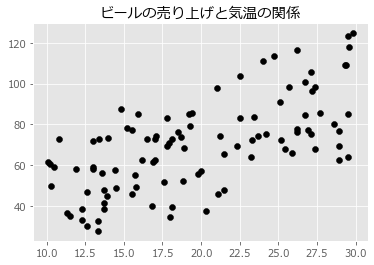

In [5]:
plt.figure()
plt.scatter(x=file_beer_sales_2['temperature'],
            y=file_beer_sales_2['sales'],
            color='black')
plt.title('ビールの売り上げと気温の関係')
plt.show()

# MCMCの実行

## dictにまとめる

rstanでは入力データをlist形式にまとめたのに対し，pystanでは入力データをdictionary形式にまとめる。

In [6]:
data_list = dict(N=sample_size,
                 sales=file_beer_sales_2['sales'],
                 temperature=file_beer_sales_2['temperature'])

## 乱数の生成（参考）

In [7]:
mcmc_result_not_vec = pystan.stan(file='3-2-1-simple-lm.stan',
                                  data=data_list,
                                  seed=1,
                                  n_jobs=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_75accf505028bba5572c105072f99a10 NOW.


## 結果の表示（参考）

In [8]:
print(mcmc_result_not_vec.stansummary(probs=[0.025, 0.5, 0.975]))

Inference for Stan model: anon_model_75accf505028bba5572c105072f99a10.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
Intercept  21.52    0.15   5.89  10.02  21.56  33.28   1529    1.0
beta        2.44  7.2e-3   0.28   1.88   2.44   3.01   1537    1.0
sigma      17.07    0.03   1.22  14.84   17.0   19.7   1948    1.0
lp__      -330.1    0.03    1.2 -333.2 -329.8 -328.7   1310    1.0

Samples were drawn using NUTS at Mon Jul 13 21:23:27 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


## 乱数の生成

In [9]:
mcmc_result = pystan.stan(file='3-2-2-simple-lm-vec.stan',
                          data=data_list,
                          seed=1,
                          n_jobs=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8b9e76e8f370b768c1b6faec53a5dd6b NOW.


## 結果の表示

In [10]:
print(mcmc_result.stansummary(probs=[0.025, 0.5, 0.975]))

Inference for Stan model: anon_model_8b9e76e8f370b768c1b6faec53a5dd6b.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
Intercept  21.24    0.17   5.87   9.55  21.24  32.93   1246    1.0
beta        2.46  7.9e-3   0.28    1.9   2.46   3.02   1283    1.0
sigma       17.1    0.03   1.27  14.84  17.01  19.87   2095    1.0
lp__      -330.1    0.03   1.25 -333.4 -329.7 -328.7   1342    1.0

Samples were drawn using NUTS at Mon Jul 13 21:24:07 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


## MCMCサンプルの抽出

In [11]:
mcmc_sample = mcmc_result.extract(permuted=False)

# 事後分布の図示

## トレースプロットと事後分布

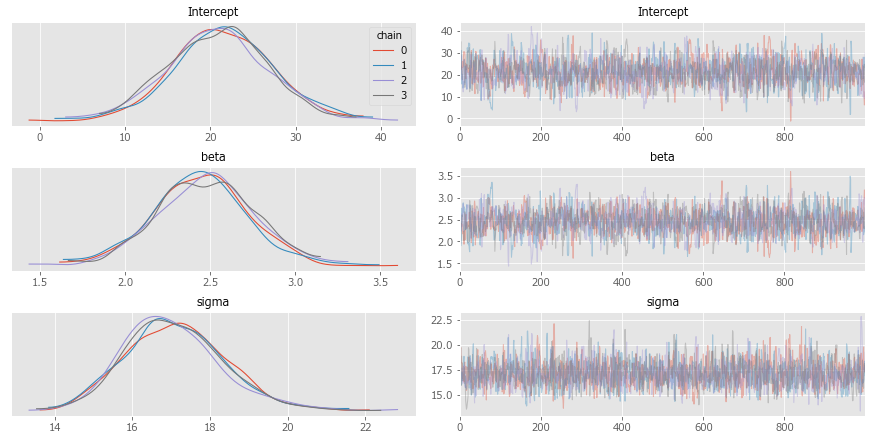

In [13]:
arviz.plot_trace(mcmc_result,
                 var_names=['Intercept', 'beta', 'sigma'],
                 legend=True);